In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import csv
import xlrd
import io
from zipfile import ZipFile
from datetime import date, timedelta, time, datetime

In [2]:
today_yyyymmdd = date.today().strftime("%Y%m%d")
print(today_yyyymmdd)

20200805


import datetime 
base = datetime.date(2020,2,1)
for i in range(0,10): 
    d=base + datetime.timedelta(i)
    d=d.strftime("%Y%m%d")
    print(f"N029kakutokuruiseki{d}.csv")

from datetime import datetime, timedelta

def date_range(start_date: datetime, end_date: datetime):
    diff = (end_date - start_date).days + 1
    return (start_date + timedelta(i) for i in range(diff))

In [4]:
#pandasの表示列数を増やす
import pandas as pd
pd.set_option('display.max_columns', 100)

リスト読込

In [41]:
data_dir = Path(r"C:\Users\crie072\Documents\01_データ関連\Adhoc\202008_消費者還元")

#新規入会リスト from CSC
in_file_1 = "15599901_H027SH_20191107_224533_IEQHJ063-cashback-uriage.csv"

In [54]:
df = pd.read_csv(data_dir /f"{in_file_1}",encoding="cp932")
df = df[['売上年月日','決済金額','屋号（漢字）','還元率','PAN']]
df[:50].head()

,売上年月日,決済金額,屋号（漢字）,還元率,PAN
0,191007,1628,ダイコクドラッグ狸小路４丁目店,5,4980121001365006
1,191029,10527,モッズ ヘア 西宮店,2,4980121001365006
2,191016,12760,鉄板焼れすとらん中はら,5,4980121001712017
3,191005,21967,牛もつどて鍋 まつい亭,5,4980121002072106
4,191008,3853,マルヤス吹田新芦屋店,5,4980121002401016


In [55]:
print(df.shape)
print(df.index)
print(df.columns)
print(df.dtypes)

(197442, 5)
RangeIndex(start=0, stop=197442, step=1)
Index(['売上年月日', '決済金額', '屋号（漢字）', '還元率', 'PAN'], dtype='object')
売上年月日      int64
決済金額       int64
屋号（漢字）    object
還元率        int64
PAN        int64
dtype: object


In [56]:
df['売上年月日'] = df['売上年月日'] + 20000000

#"年月"のカラム生成
df['売上年月日2'] = pd.to_datetime(df['売上年月日'], format = '%Y%m%d')
df['売上年'] = df['売上年月日2'].dt.year
df['売上月'] = df['売上年月日2'].dt.month

df['売上年月'] = df[['売上年', '売上月']].apply(lambda x: '{}年{}月'.format(x[0], x[1]), axis=1)
df = df.drop(columns=['売上年月日2'])

df.head()

,売上年月日,決済金額,屋号（漢字）,還元率,PAN,売上年,売上月,売上年月
0,20191007,1628,ダイコクドラッグ狸小路４丁目店,5,4980121001365006,2019,10,2019年10月
1,20191029,10527,モッズ ヘア 西宮店,2,4980121001365006,2019,10,2019年10月
2,20191016,12760,鉄板焼れすとらん中はら,5,4980121001712017,2019,10,2019年10月
3,20191005,21967,牛もつどて鍋 まつい亭,5,4980121002072106,2019,10,2019年10月
4,20191008,3853,マルヤス吹田新芦屋店,5,4980121002401016,2019,10,2019年10月


In [57]:
df = df.astype({'PAN':str})

In [58]:
print(df.shape)
print(df.index)
print(df.columns)
print(df.dtypes)

(197442, 8)
RangeIndex(start=0, stop=197442, step=1)
Index(['売上年月日', '決済金額', '屋号（漢字）', '還元率', 'PAN', '売上年', '売上月', '売上年月'], dtype='object')
売上年月日      int64
決済金額       int64
屋号（漢字）    object
還元率        int64
PAN       object
売上年        int64
売上月        int64
売上年月      object
dtype: object


In [47]:
df.groupby(['売上年月'])['決済金額'].sum()/1000000

売上年月
2019年10月    1773.620193
Name: 決済金額, dtype: float64

In [48]:
df.groupby(['売上年月'])['PAN'].count()

売上年月
2019年10月    197442
Name: PAN, dtype: int64

C:\Users\crie072\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\crie072\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\crie072\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\crie072\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\crie072\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22770 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\crie072\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 19978 missin

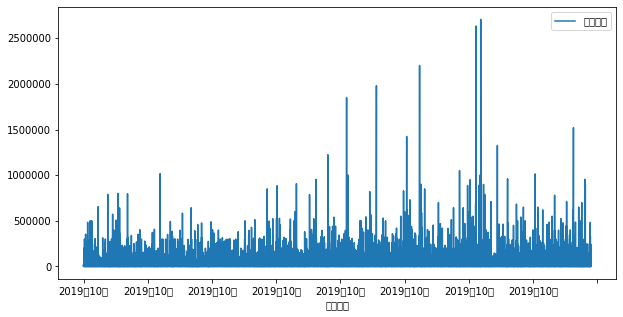

In [52]:
df.plot.line(x = '売上年月',y = '決済金額', figsize = (10, 5))